Name: ABC

ID: 123

# Loading Modules & Data

In [23]:
# Importing Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
df = pd.read_csv("API_SE.PRM.CMPT.FE.ZS_DS2_en_csv_v2_4772234.csv", skiprows=4).iloc[:, :-1]
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,101.255234,101.55587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.88575,66.028069,66.26329,66.115013,66.932449,68.167793,69.499100,69.990547,70.825378,NaN
2,Afghanistan,AFG,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.604069,66.688881,67.129303,65.761513,NaN,NaN
3,Africa Western and Central,AFW,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,64.04483,64.063690,64.65110,65.822060,66.608093,66.362289,66.722878,66.927361,67.231689,NaN
4,Angola,AGO,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preparing Data

In [24]:
# FIlling missing values
df.fillna(0, inplace=True)

In [25]:
# Extracting Valid counties
import pycountry
countries = list(pycountry.countries)
country_names = [country.name for country in countries]

df = df[df["Country Name"].isin(country_names)]

In [26]:
# Dropping all world records
index = df[df["Country Name"] == "World"].index
df.drop(index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

# Visualizations

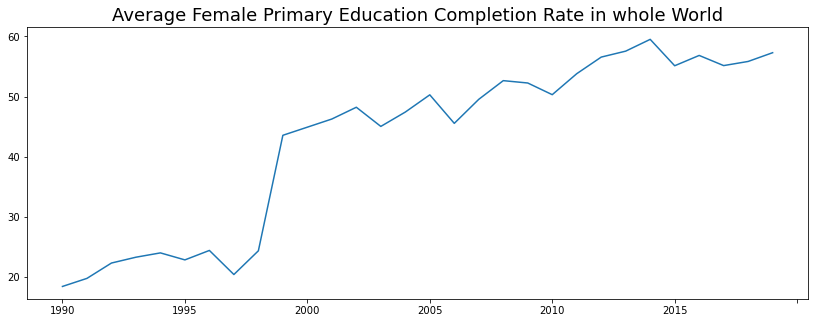

In [46]:
useless_cols = ["Country Code", "Indicator Name", "Indicator Code"]
df_edu = df.drop(useless_cols, axis=1).set_index("Country Name").iloc[:, :-2]
df_edu.iloc[:, 30:].mean().plot(kind="line", figsize=(14, 5))
plt.title("Average Female Primary Education Completion Rate in whole World", fontsize=18)
plt.show()

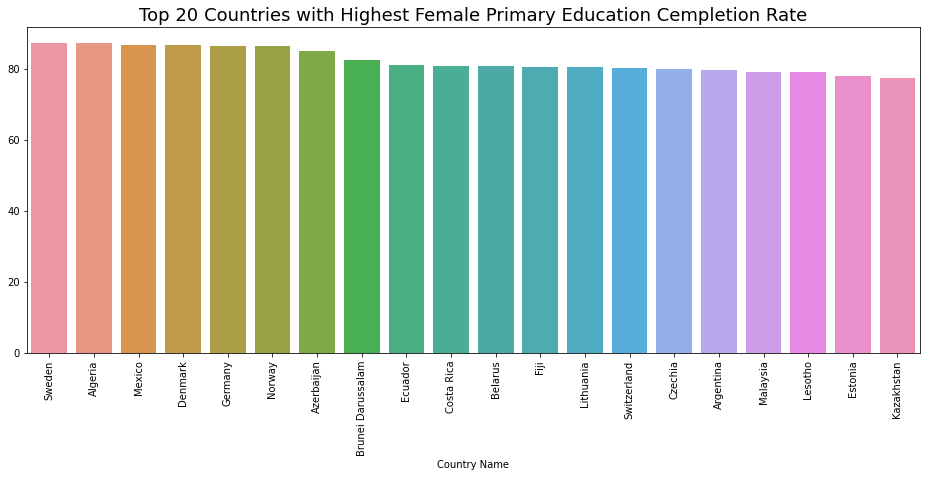

In [41]:
temp = df_edu.iloc[:, 30:].mean(axis=1).sort_values(ascending=False)
temp = temp[temp > 0][9:29]
plt.figure(figsize=(16, 6))
sns.barplot(temp.index, temp.values)
plt.title("Top 20 Countries with Highest Female Primary Education Completion Rate", fontsize=18)
plt.xticks(rotation=90)
plt.show()

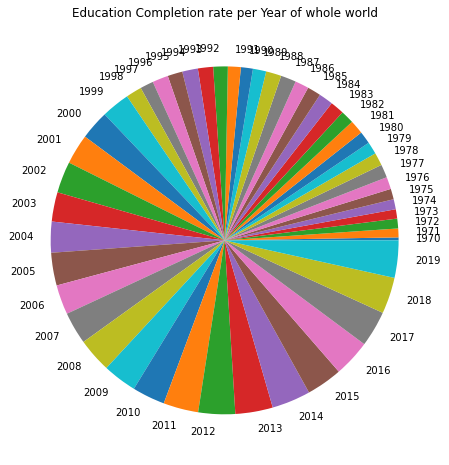

In [42]:
temp = df_edu.mean()
temp = temp[temp>0]

plt.figure(figsize=(10,8))
plt.pie(temp.values, labels=temp.index)
plt.title("Education Completion rate per Year of whole world")
plt.show()